In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
sns.set()
plt.rcParams['image.cmap'] = 'viridis'

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

# Data Loading & Exploration

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/ObesityDataSet_raw_and_data_sinthetic.csv')
data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,2,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,3,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,4,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,5,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
data.shape

(2111, 18)

In [5]:
data.drop('id',axis=1,inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


# Data Visualisation

<Axes: >

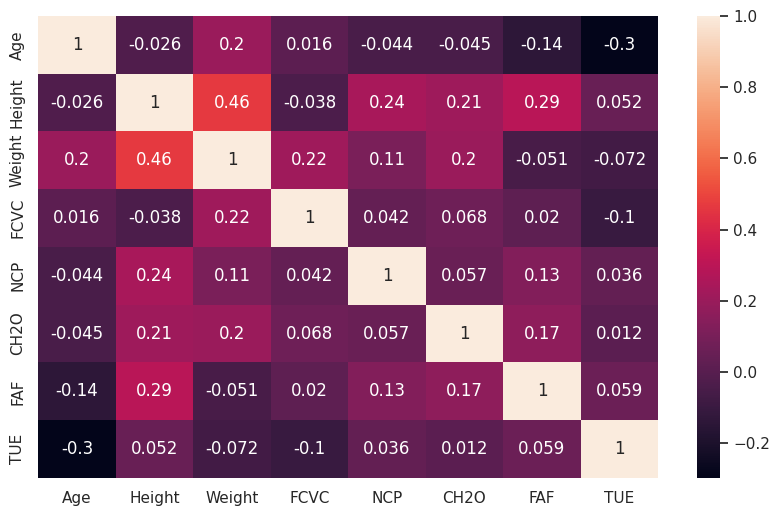

In [9]:
# Heatmap showing correlation in between features
plt.figure(figsize=(10, 6))
corr = data.corr()
sns.heatmap(corr,annot=True)

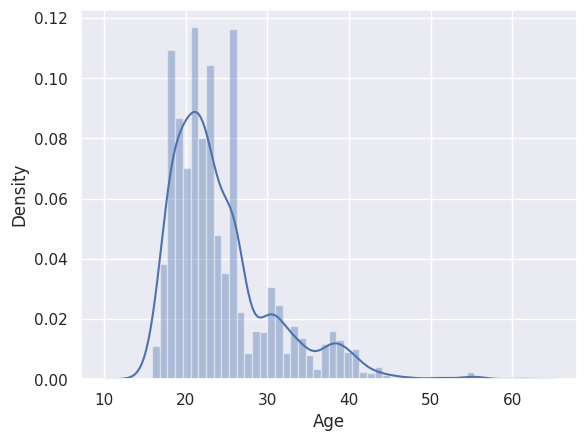

In [10]:
# Distribution plot for Age Feature
sns.distplot(data['Age'])
plt.show()

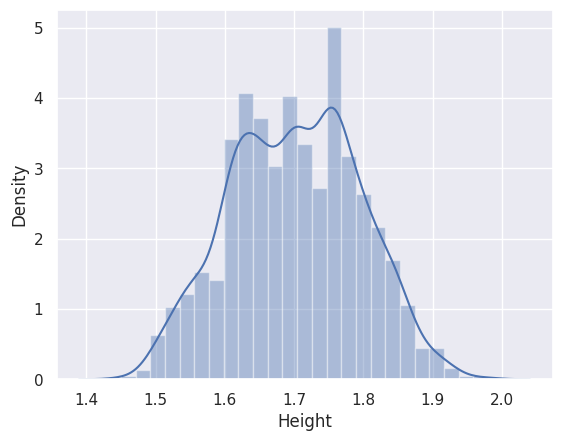

In [11]:
# Distribution plot for Height Feature
sns.distplot(data['Height'])
plt.show()

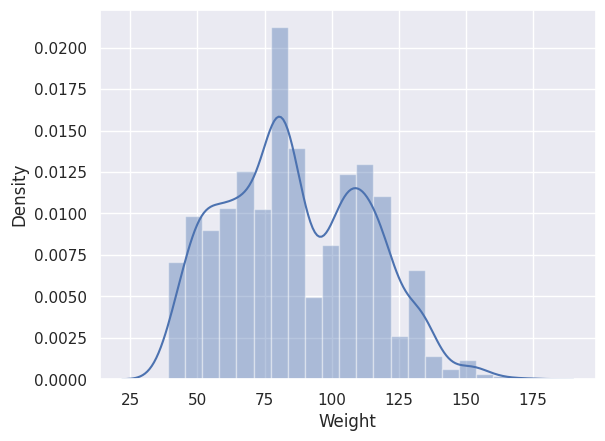

In [12]:
# Distribution plot for Weight Feature
sns.distplot(data['Weight'])
plt.show()

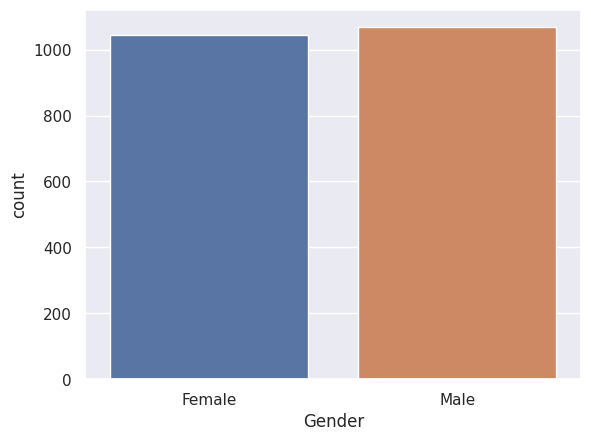

In [13]:
# Countplot for Gender feature
sns.countplot(x='Gender', data=data)
plt.show()

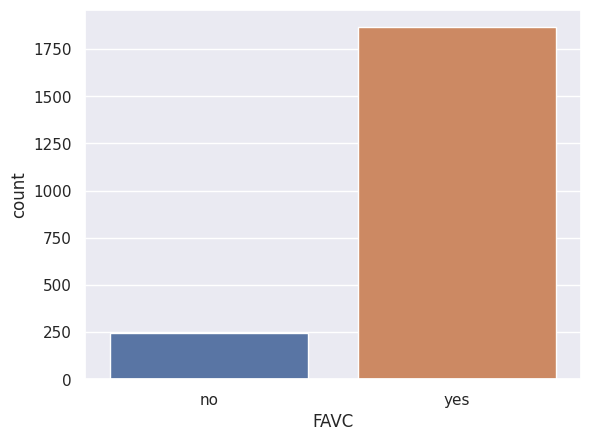

In [14]:
# Countplot for FAVC feature
sns.countplot(x='FAVC', data=data)
plt.show()

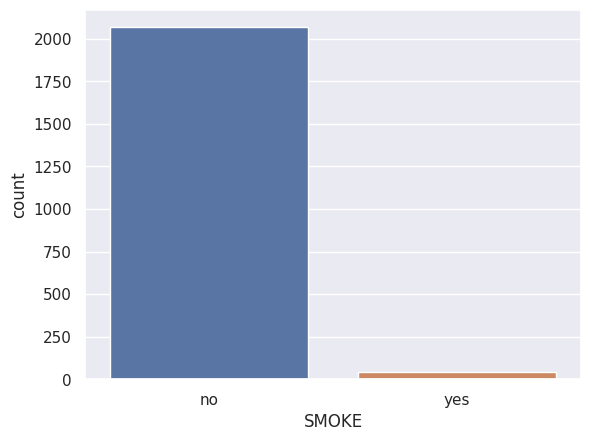

In [15]:
# Countplot for Smoke feature
sns.countplot(x='SMOKE', data=data)
plt.show()

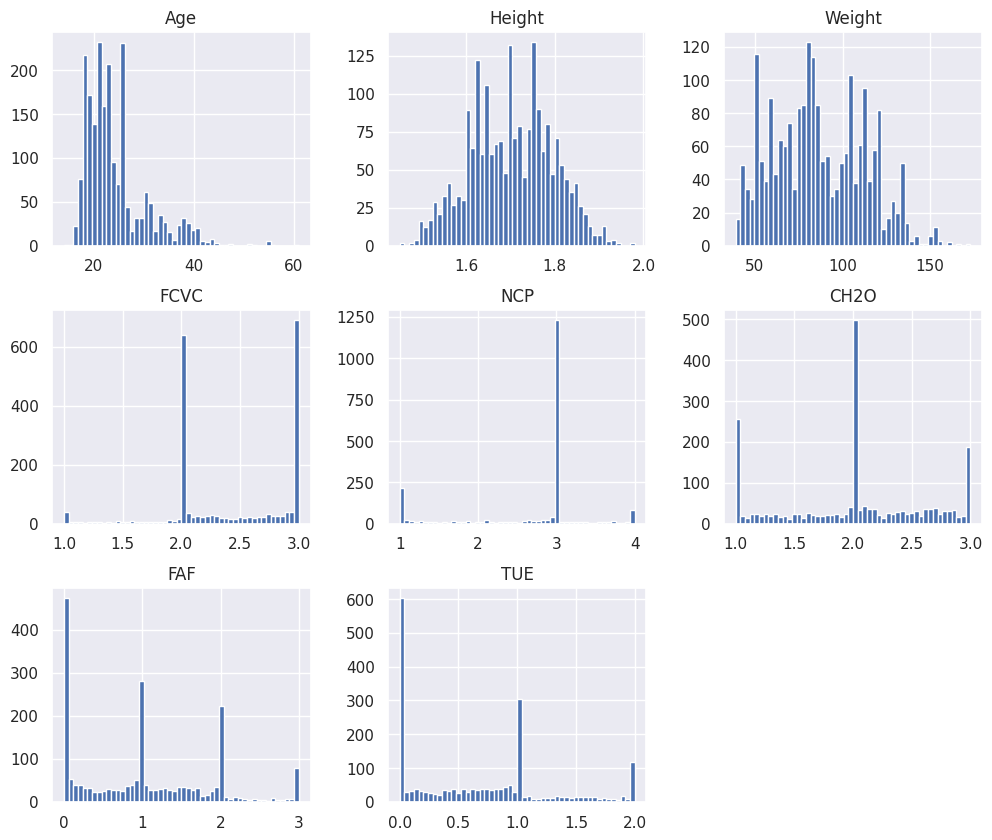

In [16]:
# Histogram for all features
data.hist(bins=50, figsize=(12,10))
plt.show()

# Data Preprocessing

In [17]:
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data['family_history_with_overweight'] = encoder.fit_transform(data['family_history_with_overweight'])
data['FAVC'] = encoder.fit_transform(data['FAVC'])
data['CAEC'] = encoder.fit_transform(data['CAEC'])
data['SMOKE'] = encoder.fit_transform(data['SMOKE'])
data['SCC'] = encoder.fit_transform(data['SCC'])
data['CALC'] = encoder.fit_transform(data['CALC'])
data['MTRANS'] = encoder.fit_transform(data['MTRANS'])
data['NObeyesdad'] = encoder.fit_transform(data['NObeyesdad'])

In [18]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

In [20]:
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

In [21]:
X.shape,y.shape

((2111, 16), (2111,))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building

## Logistic Regression

In [23]:
# Logistic Regression Classifier
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_predictions = lr_clf.predict(X_test)

In [24]:
lr_predictions

array([0, 4, 0, 0, 6, 0, 3, 5, 2, 0, 2, 4, 6, 3, 4, 6, 4, 6, 6, 2, 3, 2,
       4, 2, 1, 1, 1, 4, 4, 0, 4, 6, 2, 0, 0, 4, 2, 1, 0, 1, 0, 3, 6, 2,
       6, 0, 6, 0, 5, 3, 1, 1, 1, 5, 0, 2, 3, 3, 2, 3, 1, 4, 6, 0, 3, 3,
       1, 4, 0, 0, 2, 2, 0, 0, 1, 2, 3, 5, 4, 3, 1, 6, 3, 3, 2, 6, 5, 5,
       1, 2, 2, 3, 0, 1, 3, 0, 1, 2, 4, 3, 3, 2, 4, 2, 1, 2, 0, 4, 4, 3,
       6, 5, 2, 1, 0, 2, 2, 3, 6, 2, 4, 2, 6, 5, 6, 6, 5, 2, 4, 3, 4, 3,
       1, 2, 5, 4, 0, 4, 1, 4, 6, 5, 0, 0, 0, 3, 2, 4, 0, 2, 0, 0, 0, 3,
       6, 5, 6, 6, 0, 0, 5, 1, 2, 0, 3, 0, 3, 5, 0, 6, 0, 6, 3, 4, 2, 1,
       2, 2, 6, 6, 0, 3, 0, 1, 3, 2, 1, 4, 3, 3, 0, 4, 0, 2, 4, 1, 3, 4,
       4, 5, 3, 2, 4, 4, 1, 4, 5, 2, 2, 4, 5, 2, 0, 2, 3, 0, 5, 3, 3, 3,
       4, 5, 3, 1, 3, 2, 0, 4, 1, 6, 2, 4, 1, 5, 0, 2, 2, 6, 2, 0, 6, 2,
       5, 6, 3, 4, 1, 2, 4, 5, 2, 2, 0, 6, 1, 5, 6, 3, 2, 6, 4, 4, 5, 2,
       2, 4, 4, 0, 1, 4, 3, 4, 6, 6, 3, 2, 3, 4, 6, 0, 0, 2, 6, 4, 4, 5,
       2, 2, 0, 3, 2, 2, 1, 3, 0, 5, 3, 3, 6, 6, 1,

In [25]:
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.74      0.93      0.83        56
           1       0.53      0.42      0.47        62
           2       0.58      0.60      0.59        78
           3       0.82      0.84      0.83        58
           4       0.90      1.00      0.95        63
           5       0.54      0.38      0.44        56
           6       0.35      0.38      0.37        50

    accuracy                           0.65       423
   macro avg       0.64      0.65      0.64       423
weighted avg       0.64      0.65      0.64       423



In [26]:
cm=confusion_matrix(y_test,lr_predictions)
cm

array([[52,  2,  0,  0,  0,  2,  0],
       [17, 26,  4,  1,  1,  6,  7],
       [ 0,  0, 47,  9,  6,  3, 13],
       [ 0,  0,  3, 49,  0,  0,  6],
       [ 0,  0,  0,  0, 63,  0,  0],
       [ 1, 14, 11,  0,  0, 21,  9],
       [ 0,  7, 16,  1,  0,  7, 19]])

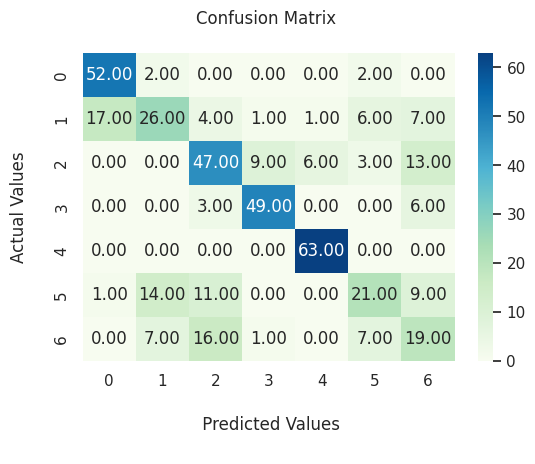

In [27]:
# Plotting confusion matrix
plt.figure(figsize=(6,4))
fx=sns.heatmap(confusion_matrix(y_test,lr_predictions), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
plt.show()

In [28]:
lr=accuracy_score(y_test, lr_predictions)
lr

0.6548463356973995

## Decision Tree

In [29]:
# Decision Tree Classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_predictions = dt_clf.predict(X_test)

In [30]:
dt_predictions

array([0, 4, 0, 0, 1, 0, 3, 5, 2, 0, 2, 4, 2, 3, 4, 6, 4, 3, 2, 6, 2, 5,
       4, 2, 1, 6, 6, 4, 4, 0, 4, 5, 6, 1, 0, 4, 2, 1, 1, 1, 1, 3, 1, 1,
       5, 0, 3, 1, 2, 3, 1, 1, 1, 5, 0, 6, 3, 3, 5, 3, 1, 4, 6, 0, 2, 2,
       1, 4, 0, 0, 6, 6, 0, 0, 5, 3, 3, 5, 4, 3, 1, 2, 3, 3, 2, 2, 1, 6,
       1, 6, 5, 3, 0, 5, 2, 0, 5, 2, 1, 3, 2, 2, 4, 2, 6, 2, 1, 4, 4, 3,
       2, 1, 6, 1, 0, 2, 2, 3, 6, 1, 4, 3, 2, 6, 1, 3, 2, 2, 4, 3, 4, 3,
       1, 2, 6, 4, 0, 4, 5, 2, 5, 6, 0, 0, 1, 3, 2, 4, 0, 2, 0, 0, 1, 3,
       2, 5, 6, 5, 0, 0, 5, 1, 2, 0, 3, 0, 3, 1, 5, 6, 1, 2, 3, 4, 2, 6,
       2, 5, 2, 5, 1, 3, 0, 1, 3, 2, 5, 4, 3, 3, 0, 4, 0, 1, 4, 1, 3, 2,
       4, 0, 3, 3, 4, 4, 1, 4, 5, 5, 2, 4, 5, 2, 0, 2, 3, 0, 5, 3, 3, 2,
       4, 6, 3, 5, 3, 6, 0, 4, 5, 5, 5, 4, 1, 5, 1, 2, 2, 2, 2, 0, 6, 6,
       5, 2, 6, 2, 1, 2, 2, 0, 5, 2, 0, 1, 1, 6, 2, 3, 2, 5, 4, 4, 5, 2,
       2, 4, 4, 1, 1, 4, 3, 4, 5, 2, 3, 2, 3, 4, 3, 0, 0, 5, 6, 4, 4, 5,
       2, 6, 0, 3, 2, 5, 0, 2, 0, 5, 3, 3, 6, 6, 1,

In [31]:
print(classification_report(y_test, dt_predictions))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        56
           1       0.90      0.89      0.89        62
           2       0.95      0.91      0.93        78
           3       0.93      0.95      0.94        58
           4       1.00      1.00      1.00        63
           5       0.90      0.93      0.91        56
           6       0.96      0.92      0.94        50

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423



In [32]:
cm=confusion_matrix(y_test,dt_predictions)
cm

array([[54,  2,  0,  0,  0,  0,  0],
       [ 5, 55,  0,  0,  0,  2,  0],
       [ 0,  0, 71,  4,  0,  1,  2],
       [ 0,  0,  3, 55,  0,  0,  0],
       [ 0,  0,  0,  0, 63,  0,  0],
       [ 0,  4,  0,  0,  0, 52,  0],
       [ 0,  0,  1,  0,  0,  3, 46]])

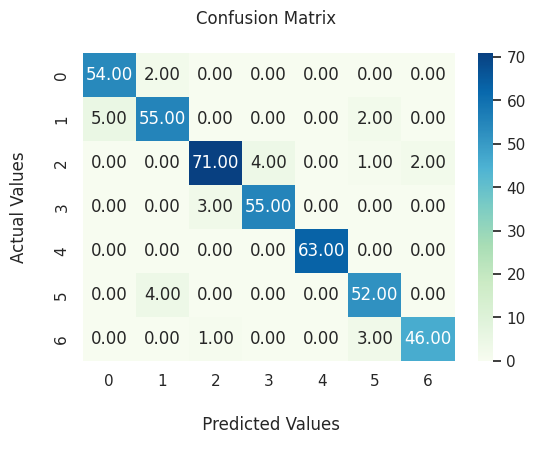

In [33]:
# Plotting confusion matrix
plt.figure(figsize=(6,4))
fx=sns.heatmap(confusion_matrix(y_test,dt_predictions), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
plt.show()

In [34]:
dt=accuracy_score(y_test, dt_predictions)
dt

0.9361702127659575

## Random Forest

In [35]:
# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_predictions = rf_clf.predict(X_test)

In [36]:
rf_predictions

array([0, 4, 0, 0, 1, 0, 3, 5, 2, 0, 2, 4, 3, 3, 4, 6, 4, 3, 2, 6, 2, 5,
       4, 2, 1, 6, 6, 4, 4, 0, 4, 5, 6, 1, 0, 4, 2, 1, 1, 1, 1, 3, 1, 1,
       5, 0, 3, 1, 2, 3, 1, 1, 1, 5, 0, 5, 3, 3, 5, 3, 1, 4, 6, 0, 3, 2,
       1, 4, 0, 1, 6, 6, 0, 0, 5, 3, 3, 5, 4, 3, 1, 2, 3, 3, 2, 2, 1, 6,
       1, 6, 6, 3, 0, 1, 2, 0, 1, 2, 5, 3, 2, 2, 4, 2, 6, 2, 1, 4, 4, 3,
       2, 1, 2, 1, 0, 2, 2, 3, 6, 1, 4, 3, 2, 6, 1, 3, 2, 2, 4, 3, 4, 3,
       1, 2, 6, 4, 0, 4, 1, 2, 5, 6, 0, 0, 1, 3, 2, 4, 0, 2, 0, 0, 1, 3,
       2, 5, 6, 5, 0, 0, 5, 1, 2, 0, 3, 0, 3, 1, 5, 6, 1, 5, 3, 4, 2, 6,
       2, 6, 2, 1, 0, 3, 0, 5, 3, 2, 5, 4, 3, 3, 0, 4, 0, 1, 4, 1, 3, 2,
       4, 0, 3, 3, 4, 4, 1, 4, 5, 5, 2, 4, 5, 2, 0, 2, 3, 0, 5, 3, 3, 2,
       4, 6, 3, 5, 3, 6, 0, 4, 5, 5, 5, 4, 1, 5, 1, 2, 2, 2, 2, 0, 6, 6,
       5, 2, 6, 2, 1, 2, 2, 0, 5, 2, 0, 5, 1, 6, 2, 3, 2, 2, 4, 4, 5, 2,
       2, 4, 4, 1, 1, 4, 3, 4, 6, 2, 3, 2, 3, 4, 3, 1, 0, 5, 6, 4, 4, 5,
       2, 6, 0, 3, 2, 5, 1, 2, 0, 5, 3, 3, 6, 6, 1,

In [37]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.88      0.90      0.89        62
           2       0.99      0.96      0.97        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.86      0.88      0.87        56
           6       0.96      0.96      0.96        50

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



In [38]:
cm=confusion_matrix(y_test,rf_predictions)
cm

array([[54,  2,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  6,  0],
       [ 0,  0, 75,  2,  0,  0,  1],
       [ 0,  0,  1, 57,  0,  0,  0],
       [ 0,  0,  0,  0, 63,  0,  0],
       [ 0,  6,  0,  0,  0, 49,  1],
       [ 0,  0,  0,  0,  0,  2, 48]])

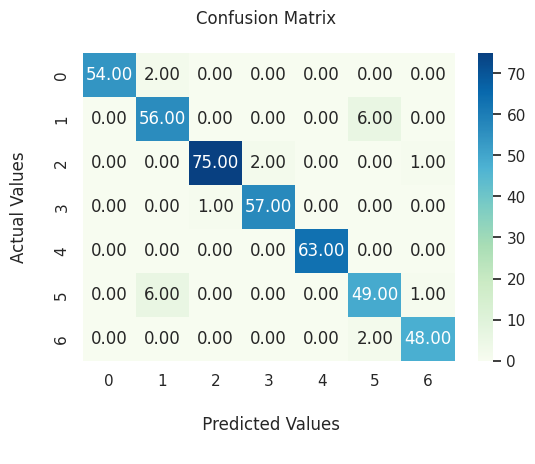

In [39]:
# Plotting confusion matrix
plt.figure(figsize=(6,4))
fx=sns.heatmap(confusion_matrix(y_test,rf_predictions), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
plt.show()

In [40]:
rf=accuracy_score(y_test, rf_predictions)
rf

0.950354609929078

## XGboost classifier

In [41]:
# XGBoost Classifier
xg_clf = XGBClassifier()
xg_clf.fit(X_train, y_train)
xg_predictions = xg_clf.predict(X_test)

In [42]:
xg_predictions

array([0, 4, 0, 0, 1, 0, 3, 5, 2, 0, 2, 4, 3, 3, 4, 6, 4, 3, 2, 6, 2, 5,
       4, 2, 1, 6, 6, 4, 4, 0, 4, 5, 6, 1, 0, 4, 2, 1, 1, 1, 1, 3, 1, 1,
       5, 0, 3, 1, 2, 3, 1, 1, 1, 5, 0, 6, 3, 3, 5, 3, 1, 4, 6, 0, 2, 2,
       1, 4, 0, 0, 6, 6, 0, 0, 5, 3, 3, 5, 4, 3, 1, 2, 3, 3, 2, 2, 1, 6,
       1, 6, 6, 3, 0, 5, 2, 0, 5, 2, 1, 3, 2, 2, 4, 2, 6, 5, 1, 4, 4, 3,
       2, 1, 2, 1, 0, 2, 2, 3, 6, 1, 4, 3, 2, 6, 1, 3, 2, 2, 4, 3, 4, 3,
       1, 2, 6, 4, 0, 4, 1, 2, 5, 6, 0, 0, 1, 3, 2, 4, 0, 2, 0, 0, 1, 3,
       2, 5, 6, 5, 0, 0, 1, 1, 2, 0, 3, 0, 3, 5, 5, 6, 1, 6, 3, 4, 2, 6,
       2, 6, 2, 1, 0, 3, 0, 5, 3, 2, 5, 4, 3, 3, 0, 4, 0, 1, 4, 1, 3, 2,
       4, 0, 3, 3, 4, 4, 1, 4, 5, 5, 2, 4, 5, 2, 0, 2, 3, 0, 5, 3, 3, 2,
       4, 5, 3, 5, 3, 6, 0, 4, 5, 5, 5, 4, 1, 5, 1, 2, 2, 2, 2, 0, 6, 6,
       5, 2, 2, 2, 1, 2, 2, 0, 5, 2, 0, 5, 1, 6, 2, 3, 2, 5, 4, 4, 5, 2,
       2, 4, 4, 1, 1, 4, 3, 4, 6, 2, 3, 2, 3, 4, 3, 0, 0, 5, 6, 4, 4, 5,
       2, 6, 0, 3, 2, 5, 0, 2, 0, 5, 3, 3, 6, 6, 1,

In [43]:
print(classification_report(y_test, xg_predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        56
           1       0.95      0.87      0.91        62
           2       0.97      0.95      0.96        78
           3       0.97      0.97      0.97        58
           4       1.00      1.00      1.00        63
           5       0.88      0.93      0.90        56
           6       0.98      0.98      0.98        50

    accuracy                           0.96       423
   macro avg       0.95      0.96      0.95       423
weighted avg       0.96      0.96      0.95       423



In [44]:
cm=confusion_matrix(y_test,xg_predictions)
cm

array([[56,  0,  0,  0,  0,  0,  0],
       [ 4, 54,  0,  0,  0,  4,  0],
       [ 0,  0, 74,  2,  0,  2,  0],
       [ 0,  0,  2, 56,  0,  0,  0],
       [ 0,  0,  0,  0, 63,  0,  0],
       [ 0,  3,  0,  0,  0, 52,  1],
       [ 0,  0,  0,  0,  0,  1, 49]])

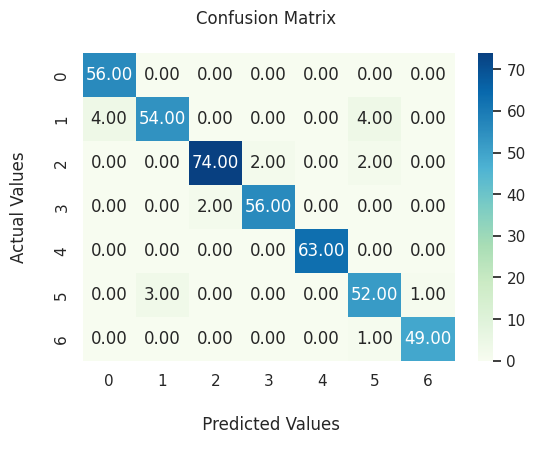

In [45]:
# Plotting confusion matrix
plt.figure(figsize=(6,4))
fx=sns.heatmap(confusion_matrix(y_test,xg_predictions), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
plt.show()

In [46]:
xg=accuracy_score(y_test, xg_predictions)
xg

0.9550827423167849

# Models Comparison

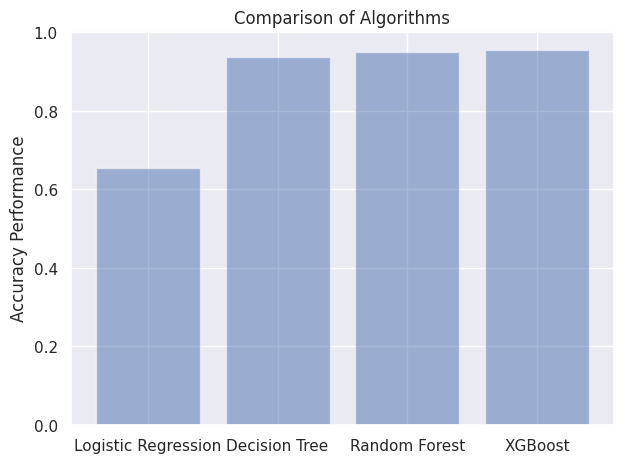

In [47]:
#Accuracy model comparison
algorithms = ['Logistic Regression', 'Decision Tree','Random Forest', 'XGBoost']
acc = [lr,dt,rf,xg]

fig, ax = plt.subplots()
ax.bar(algorithms, acc, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Accuracy Performance')
ax.set_xticks(algorithms)
ax.set_title('Comparison of Algorithms')
plt.tight_layout()
plt.show()